# Machine Learning Engineer Nanodegree

I was not able to successfully convert the notebook to after running the command "jupyter nbconvert boston-housing.ipynb --to pdf" after installing all the neccessary dependencies. I have therefore uploaded the HTML document instead.

## Model Evaluation & Validation

## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [4]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [5]:
# Number of houses in the dataset
total_houses = housing_features.shape[0]

# Number of features in the dataset
total_features = housing_features.shape[1]

# Minimum housing value in the dataset
minimum_price = housing_prices.min()

# Maximum housing value in the dataset
maximum_price = housing_prices.max()

# Mean house value of the dataset
mean_price = housing_prices.mean()

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: ** Looking at the features the first thing that struck me is how little i actually know about houses and which factors influence their prices. It makes it even worse that the data is from another geographical region i have no knowledge about (tax-laws, etc.). The feature descriptions were also fairly short and difficult to understand given my lack of context. If i was to pick three i would pick:

* **1. CRIM** (per capita crime rate by town): The crime rate is often displayed as number of criminal offenders per 100,000 residents. People, especially those with families generally prefer to live in safe neighborhoods.
* **8. DIS** (weighted distances to five Boston employment centres): people don't generally like spending time in traffic, which means that houses close to employment centers probably will be valued higher than houses far away. A larger distance to work centers are weighted more heavily.
* **11. PTRATIO:** (pupil-teacher ratio by town): Average number of pupils per teacher. May be viewed as an indicator of the quality of a school system.

## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [6]:
# deduct 1 from the feature numbers as python indices start from 0
for i in [0, 7, 10]:
    print CLIENT_FEATURES[0][i]

11.95
1.385
20.2


**Answer: **

* **CRIM**: 11.95
* **DIS**: 1.385
* **PTRATIO**: 12.13

# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [7]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """
    
    # shuffle the data
    X, y = shuffle(X, y)
    
    # generate a 70:30 hold-out dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0)
    
    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Question 3
*Why do we split the data into training and testing subsets for our model?*

**Answer: ** To assess how well our model performs we cannot test it on the same data that was used for training. We wish to make a model that generalizes to new data instead of just memorizing the data. If you make a model that memorizes all the data and test it on the same data, it will always be 100% correct. One example of such a model is K-nearest neighbors (KNN) looking only at the closest neighbour (K=1) you will always find a matching example and achieve a score of 100%. If we optimize our model this way, we will tend to *over-fit* the data. A better way to test a model is therefore to use a hold-out set which doesn't enter the training. In this way we can optimize our model to deal with new and previously unseen examples.

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [8]:
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_squared_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4

*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: ** Predicting housing prices is a regression problem, meaning that the first four metrics on the list are not appropriate as they are typically used for classification tasks. MSE and MAE both seem to be good candidates for performance metrics.

The formula for Mean Absolute Error is the following:

$MAE = \frac{1}{n} \sum_{i=1}^{n} |f_i - y_i|$

E.g. if we wish to predict the house prices for two houses with the following values (in 1000$): 40 and 50. If our model predicts 30 for the first house and 50 for the last house our MAE will be 5. We will achieve the same MAE score when missing by 5 on each prediction.

$ \frac{1}{2} (|30-40| + |50-50|) = 5$

$ \frac{1}{2} (|35-40| + |55-50|) = 5$

The Mean Squared Error metric on the other has the following formula.

$MSE = \frac{1}{n} \sum_{i=1}^{n} (f_i - y_i)^2$

Squaring the error means that the deviation from the true value always will be positive.

$ \frac{1}{2} ((30-40)^2 + (50-50)^2) = 50$

$ \frac{1}{2} ((35-40)^2 + (55-50)^2) = 25$

Taking the square of the error means that we will give more weight to large errors, as illustrated above. And the question is therefore, which of the two are better? In my opinion it comes down to how much you wish to penalize outliers.

**MSE**:

* Minimizing the MSE is the same as minimizing the variance.
* Incorporates both the variance and bias of the model
* Sensitive to outliers

**MAE**:

* The results are more easily interpretable than the MSE
* All errors are weighted linearly
* More robust to outliers

For this particular task i believe both metrics should work fine and it is hard to give a good argument for choosing one of the two. Optimizing the model based on MSE would give us a model with lower variance and more consistent predictions.

## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 3**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [9]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    # A lower MAE score is considered better than a higher score
    scoring_function = make_scorer(mean_squared_error, greater_is_better=False)

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor, parameters, scoring_function, cv=10)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: ** Machine Learning is about building programs with **tunable parameters** (typically an array of floating point values) that are adjusted automatically so as to improve their behavior by adapting to previously seen data. For our random forest regressor model we have many features such as e.g. **n_estimators** and **max_features**. The problem is that it is not always obvious how to set these parameters, and it can be very time consuming. Grid search can be used to search a parameter space for the best cross-validation score to determine which parameter combinations produce the most powerful model.

My choice of using k=10 is somewhat arbitrary. As we have a fairly small dataset we are not particularily worried about higher running times. Using a higher k usually means that it is more expensive, higher variance and less bias, while using a low k value is cheaper, gives less variance, but more bias.

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: ** One of the main problems with validation sets is that you "lose" some of the data. Above we only used 70% of the data for training and 30% for validation. Another option is to use K-fold cross-validation where you split the data into k subsets and repeat the hold-out method (described in Question 3) k times, where each chunk gets a turn as the validation set. We then the average error across all the k trials. This gives us a more robust estimate of how well our model is doing. 

The main advantage of cross-validation when searching the parameter space is that get a more robust estimate of how well our model is doing. We can therefore be more confident in the parameters returned from the grid search.

# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [10]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [11]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


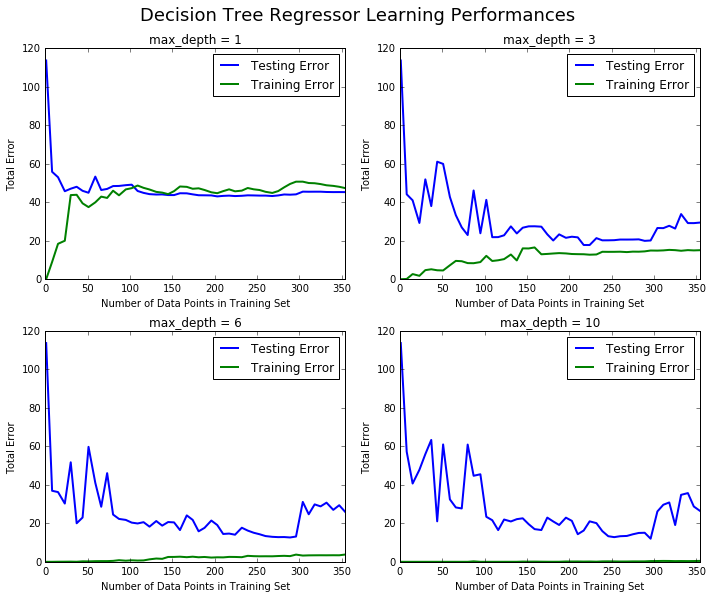

In [13]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: ** I have chosen to discuss **plot 1** as it is a classic example of a model that underfits the data. The model in question has a max_debt of 1. To understand what is happening the first step would be to explain how a model with debt 1 looks like. The depth of a tree is the maximum number of queries that can happen before a leaf is reached and the results obtained. In other words it is a very simple model, that most likely is oversimplified.

As the size of the training set increases the training error increases. This is most likely due to the fact that the data are intrinsically more complicated than what we can represent with a single query, such a model will never be able to describe the dataset well.

The testing error decreased until we have used around 25 data points to train our model. After the point the model performance on the test-set stays more or less the same. It is also interesting to see that our model has a fairly similar to performance on the training-set and the test-set which means that it absolutely does not overfit the data.

We end up with a model that is not able to represent the traning data well in addition to having poor performance when attempting to label new data. Such a model is said to underfit the data, meaning that it does not have enough flexibility to account for all the features in the data. A model that underfits the data has a high bias. To illustrate what i mean by this consider the following example inspired by Jake Vanderplas (https://github.com/jakevdp/sklearn_pycon2015).

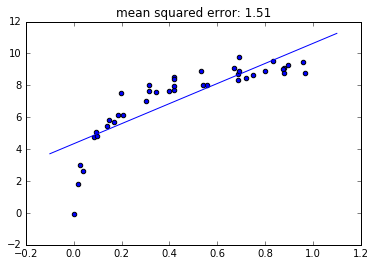

In [27]:
from sklearn.linear_model import LinearRegression

def test_func(x, err=0.5):
    y = 10 - (1. / (x + 0.1))
    if err > 0:
        y = np.random.normal(y, err)
    return y

def make_data(N=40, error=1.0, random_seed=1):
    np.random.seed(1)
    X = np.random.random(N)[:, np.newaxis]
    y = test_func(X.ravel(), error)
    return X, y

X, y = make_data(40, error=0.5)
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

model = LinearRegression()
model.fit(X, y)
y_test = model.predict(X_test)

pl.scatter(X, y)
pl.plot(X_test.ravel(), y_test)
pl.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)));

The model attempts to find a straight-line through the data. Because the data is more complicated than a straight line, the model cannot describe the dataset well. In this case the scenario will be fairly different as we have multiple variables, but the concept remains the same. The conclusion is we must increase the debt of the model to improve its performance as we cannot label the objects based on a single attribute (one query) alone.

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: ** When the model has a max depth of 1 it has a high bias but low variance. The difference between the two error rates is small (low variance), but the total error is high (high bias). When the max debt is 10 we have a model with a low bias, but high variance. Since i already talked quite extensively about max debt = 1 in the previous question lets take a closer look at what happens when you give your model too much flexibility. Consider the following example where i attempt to fit a much more complex model to the same data as in question 7. Here i train a 100th degree polynomial regression model. When we test our model on our training examples we achieve a very low MSE score of 0.0729 (low bias) and to model almost perfectly fits our data. However, when plotting the function y which the data is generated from (without noise) we see that our model looks nothing like it. If our model was to make a prediction for the point illustrated with the purple x it would miss by a gigantic margin, meaning that we have a high variance model.

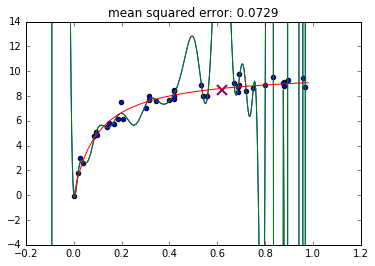

In [340]:
from IPython.html.widgets import interact
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def interactive_regression(r=100, plot_y=False):
    model = PolynomialRegression(r)
    model.fit(X, y)
    y_test = model.predict(X_test)
    pl.scatter(X.ravel(), y)
    pl.plot(X_test.ravel(), y_test)
    pl.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)))
    pl.plot([0.62], [8.5], 'x', color='purple', markeredgewidth=2, markersize=10)
    pl.ylim(-4, 14)
    pl.plot(X_test.ravel(), y_test);
    if plot_y:
        plot_true_y()
    
def plot_true_y():
    x = np.arange(0, 1, 0.02);
    # The real y function
    y = 10 - 1. / (x + 0.1)
    pl.plot(x, y)

interact(interactive_regression, r=[1, 100], plot_y=False);

Creating a model complexity graph. . . 


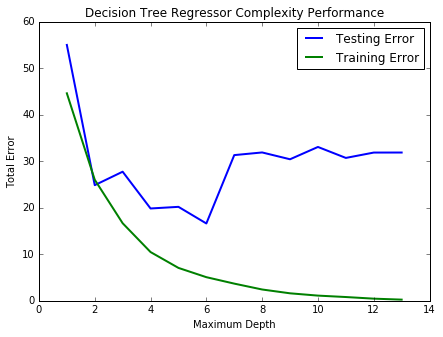

In [436]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9

*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: ** As the model complexity increases the model fit has enough flexibility to nearly perfectly account for the fine features in the data and achieve a nearly perfect training error. However, even though the model accurately is able to describe the training data it *learns the data* instead of the intrinsic properties of the process that generated that data. If we look at the testing error it stagnates after we git a maximum depth of 4, and it even increases after we hit the maximum depth of 6. After the maximum depth has reached 6 the testing error rate and training error rate diverge. I would therefor argue that the optimal choice of max depth would be in the range 4-6 as this is where the testing curve plateau and there is a somewhat consistent gap between the two error rates.

# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [423]:
for i in range(10):
    reg = fit_model(housing_features, housing_prices)
    print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 5
Final model has an optimal max_depth parameter of 6
Final model has an optimal max_depth parameter of 6
Final model has an optimal max_depth parameter of 6
Final model has an optimal max_depth parameter of 6
Final model has an optimal max_depth parameter of 10
Final model has an optimal max_depth parameter of 6
Final model has an optimal max_depth parameter of 7
Final model has an optimal max_depth parameter of 7
Final model has an optimal max_depth parameter of 5


**Answer: ** Repeating the experiment 10 times we ended up with an average of 6.4. I was expecting a number in the range 4-6, but 6.4 is fairly close. The optimal max_depth parameter for my model would therefore be 6 when rounding the result.

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [418]:
for i in range(10):
    reg = fit_model(housing_features, housing_prices)
    sale_price = reg.predict(CLIENT_FEATURES)
    print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 19.327
Predicted value of client's home: 20.968
Predicted value of client's home: 20.968
Predicted value of client's home: 18.817
Predicted value of client's home: 20.968
Predicted value of client's home: 19.997
Predicted value of client's home: 20.720
Predicted value of client's home: 19.997
Predicted value of client's home: 19.997
Predicted value of client's home: 19.327


**Answer: ** Repeating the experiment 10 times we end up with an average best selling price of 20 109 USD. This price is a bit lower than both the mean (22 533 USD) and median (21 200 USD) house prices, but well within a standard deviation. The house therefore seems to be a fairly average house compared to the others in the dataset, and is definitely no outlier.

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: ** My answer is no. One of the main reasons being the dataset we have used to train the model. If we ignore the date the data was collected (1993) i think it is missing too much data compared to what most competitors have available. There are no features describing the property itself such as size, house size in sqf, the number of bedrooms and so on. I think this would be really important to have instead of just using aggregated statistics on homes from the same area. The number of samples are also low for machine learning problem. Having more samples mean that we can be more confident in our results. I might have considering using some other machine learning method like a RandomForestRegressor or similar. However, given that you had a sufficiently large dataset i think machine learning could be applied successfully to the task of predicting housing prices.